# Stock Price Prediction using News Headlines

In [48]:
#importing libraries
import pandas as pd
import numpy as np
import bamboolib as bam
from sklearn.preprocessing import MinMaxScaler

## Importing Dataset

<p>We are going to use two datasets:</p>
<ul>
    <li>First one is a dataset that contains the column <b>Date</b> and <b>News</b>. It contains News headlines for each day starting from 2008 till 2016. In total it has 73608 rows.
    </li>
    <li>Second one is a dataset that contains the column <b>Date</b>,<b>Open</b>,<b>High</b>,<b>Low</b>,<b>Close</b>,<b>Volume</b> and <b>Adj Close</b>. It contains daily Stocks information for Dow Jones which containes 30 most prominent countries in the United States, starting from 2008 till 2016.
    </li>
    
</ul>

In [3]:
#importing the dataset
news_data=pd.read_csv("Dataset\RedditNews.csv")
stock_price=pd.read_csv("Dataset\DJStockPrice.csv")

## Data Exploration and Visualization

In [4]:
news_data

             Date                                               News
0      2016-07-01  A 117-year-old woman in Mexico City finally re...
1      2016-07-01   IMF chief backs Athens as permanent Olympic host
2      2016-07-01  The president of France says if Brexit won, so...
3      2016-07-01  British Man Who Must Give Police 24 Hours' Not...
4      2016-07-01  100+ Nobel laureates urge Greenpeace to stop o...
...           ...                                                ...
73603  2008-06-08  b'Man goes berzerk in Akihabara and stabs ever...
73604  2008-06-08  b'Threat of world AIDS pandemic among heterose...
73605  2008-06-08  b'Angst in Ankara: Turkey Steers into a Danger...
73606  2008-06-08  b"UK: Identity cards 'could be used to spy on ...
73607  2008-06-08  b'Marriage, they said, was reduced to the stat...

[73608 rows x 2 columns]

In [5]:
#No missing values
news_data.isnull().sum()

Date    0
News    0
dtype: int64

In [426]:
stock_price

            Date          Open          High           Low         Close  \
0     2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1     2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2     2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
3     2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
4     2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   
...          ...           ...           ...           ...           ...   
1984  2008-08-14  11532.070312  11718.280273  11450.889648  11615.929688   
1985  2008-08-13  11632.809570  11633.780273  11453.339844  11532.959961   
1986  2008-08-12  11781.700195  11782.349609  11601.519531  11642.469727   
1987  2008-08-11  11729.669922  11867.110352  11675.530273  11782.349609   
1988  2008-08-08  11432.089844  11759.959961  11388.040039  11734.320312   

         Volume     Adj Close  
0      82160000  17949.369141  
1     133030000  17929.

In [6]:
#No missing values
stock_price.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [7]:
print("News dataset shape:",news_data.shape)
print("Stock dataset shape:",stock_price.shape)

News dataset shape: (73608, 2)
Stock dataset shape: (1989, 7)


## Data Preprocessing
<ul>
    <li> Removal of extra dates from the News dataset</li>
    <li> Romoval of extra columns from the Price dataset</li>
    <li> Taking first difference of open price of the stock </li>
    <li> Removal of Null values</li>
    <li> Combination of both the datasets that contains Price and News headlines information.</li>
    <li> Normalizing the Market Opening Price.</li>
    <li> Text Preprocessing: removing Stopwards, Contractions, making text Lowercase, rempving extra white spaces and punctuations</li>
    <li>Defining a Vocabulary by using a Counter, which is a dictionary mapping of words and their counts that allow us to easily update and query.</li>
</ul>

In [8]:
#Comparing the dates between two datasets to know if we have more than 2 headlines for each day
print(len(set(news_data['Date'])))
print(len(set(stock_price['Date'])))

#we are going to remove the extra dates so that we have one news headline for each day

2943
1989


In [9]:
#removing the extra dates 
news_data=news_data[news_data['Date'].isin(stock_price.Date)]

In [10]:
#Both have the same
print(len(set(news_data['Date'])))
print(len(set(stock_price['Date'])))

1989
1989


In [11]:
#Our goal is to make a model that will predict the opening of a market based on today's news
#Dropping the rest of the columns
stock_price=stock_price.drop(['High','Low','Close','Volume','Adj Close'],axis=1)
stock_price

            Date          Open
0     2016-07-01  17924.240234
1     2016-06-30  17712.759766
2     2016-06-29  17456.019531
3     2016-06-28  17190.509766
4     2016-06-27  17355.210938
...          ...           ...
1984  2008-08-14  11532.070312
1985  2008-08-13  11632.809570
1986  2008-08-12  11781.700195
1987  2008-08-11  11729.669922
1988  2008-08-08  11432.089844

[1989 rows x 2 columns]

In [12]:
stock_price=stock_price.set_index('Date')
import pandas as pd; import numpy as np
stock_price = stock_price.reset_index()
stock_price

            Date          Open
0     2016-07-01  17924.240234
1     2016-06-30  17712.759766
2     2016-06-29  17456.019531
3     2016-06-28  17190.509766
4     2016-06-27  17355.210938
...          ...           ...
1984  2008-08-14  11532.070312
1985  2008-08-13  11632.809570
1986  2008-08-12  11781.700195
1987  2008-08-11  11729.669922
1988  2008-08-08  11432.089844

[1989 rows x 2 columns]

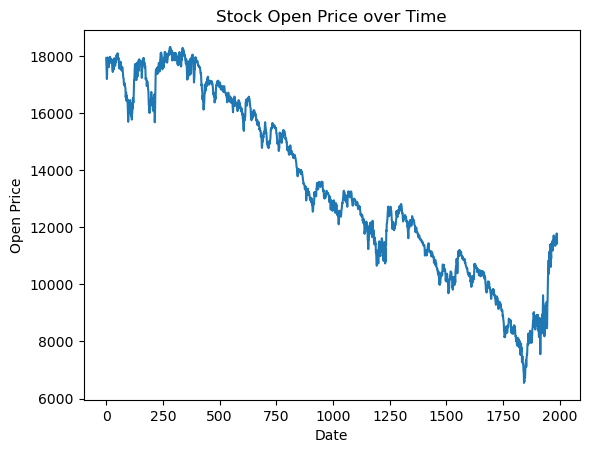

In [15]:
import matplotlib.pyplot as plt

plt.plot(stock_price['Open'])
plt.title('Stock Open Price over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

### ADF Test

To test whether or not differencing is necessary for a time series analysis, one common approach is to use a statistical test called the Augmented Dickey-Fuller (ADF) test. This test is designed to check whether a time series is stationary or non-stationary.

The null hypothesis of the ADF test is that the time series has a unit root (i.e., it is non-stationary), while the alternative hypothesis is that the time series is stationary. Therefore, if the p-value of the test is below a certain significance level (e.g., 0.05), we reject the null hypothesis and conclude that the time series is stationary. If the p-value is above the significance level, we fail to reject the null hypothesis and conclude that the time series is non-stationary.

In [16]:
from statsmodels.tsa.stattools import adfuller
# Perform ADF test on Open column
result = adfuller(stock_price["Open"])
print("ADF test p-value: ", result[1])

ADF test p-value:  0.6220585722348048


This suggests that the Open column of the stock_price dataframe may be non-stationary and may require differencing to achieve stationarity. The p-value is 0.622, which is above the typical significance level of 0.05.

In [19]:

#Taking first difference of the target variable because the model will try to predict the opening prices in following and current day
# Perform differencing on Open column
stock_price["Open"] = -1 * stock_price["Open"].diff(periods=1)

# Reset index
stock_price = stock_price.reset_index()

# Drop the first row (since it will have a NaN value after differencing)
stock_price = stock_price.dropna()

# Print the resulting dataframe
stock_price


      index        Date        Open
1         1  2016-06-30  211.480468
2         2  2016-06-29  256.740235
3         3  2016-06-28  265.509765
4         4  2016-06-27 -164.701172
5         5  2016-06-24 -591.419921
...     ...         ...         ...
1984   1984  2008-08-14   79.139649
1985   1985  2008-08-13 -100.739258
1986   1986  2008-08-12 -148.890625
1987   1987  2008-08-11   52.030273
1988   1988  2008-08-08  297.580078

[1988 rows x 3 columns]

In [20]:
stock_price.isnull().sum()

index    0
Date     0
Open     0
dtype: int64

In [21]:
#removing null values in the Open column
stock_price=stock_price[stock_price.Open.notnull()]
stock_price

      index        Date        Open
1         1  2016-06-30  211.480468
2         2  2016-06-29  256.740235
3         3  2016-06-28  265.509765
4         4  2016-06-27 -164.701172
5         5  2016-06-24 -591.419921
...     ...         ...         ...
1984   1984  2008-08-14   79.139649
1985   1985  2008-08-13 -100.739258
1986   1986  2008-08-12 -148.890625
1987   1987  2008-08-11   52.030273
1988   1988  2008-08-08  297.580078

[1988 rows x 3 columns]

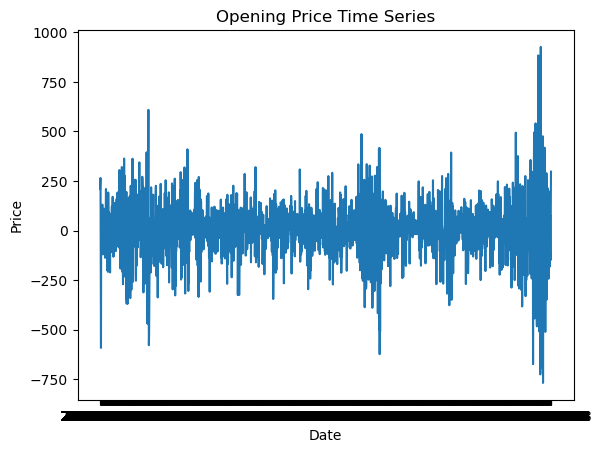

In [27]:
import matplotlib.pyplot as plt

# Plot the time series after differencing
plt.plot(stock_price['Date'], price)

# Set the title and axis labels
plt.title('Opening Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')

# Show the plot
plt.show()


In [22]:
#Combining both the datasets
# Create a list of opening prices and their corresponding headlines from the news
# Define/Intialize the variables
price= []
headlines=[]

# for all the rows in dataframe
for row in stock_price.iterrows():
    # define a variable to store all headlines for the day
    daily_headlines=[]
    # Spot the date in given row
    date= row[1]['Date']
    # Store the price for the data
    price.append(row[1]['Open'])
    for row_ in news_data[news_data.Date==date].iterrows():
        daily_headlines.append(row_[1]['News'])
        
    # Append the headlines for the date
    headlines.append(daily_headlines)

In [23]:
#Looking at the distribution of the target variable(price)
min_value=min(price)
max_value=max(price)
print(min_value)
print(max_value)

-768.0400389999995
926.5498050000006


In [24]:
#Looking at the min and max value above we will normalize the values
price_norm=[]
for i in price:
    normalized_price = ((i-min_value) / (max_value-min_value))
    price_norm.append(normalized_price)

In [25]:
#Price column normalized
print("Max value",max(price_norm))
print("Min value",min(price_norm))
print("Mean valie",np.mean(price_norm))

Max value 1.0
Min value 0.0
Mean valie 0.4551577545098642


In [26]:
#Next we have to work on the Headlines
print(headlines[:1])
#Looking at the text below we need to first clean the our Headlines 

[['Jamaica proposes marijuana dispensers for tourists at airports following legalisation: The kiosks and desks would give people a license to purchase up to 2 ounces of the drug to use during their stay', "Stephen Hawking says pollution and 'stupidity' still biggest threats to mankind: we have certainly not become less greedy or less stupid in our treatment of the environment over the past decade", 'Boris Johnson says he will not run for Tory party leadership', 'Six gay men in Ivory Coast were abused and forced to flee their homes after they were pictured signing a condolence book for victims of the recent attack on a gay nightclub in Florida', 'Switzerland denies citizenship to Muslim immigrant girls who refused to swim with boys: report', 'Palestinian terrorist stabs israeli teen girl to death in her bedroom', 'Puerto Rico will default on $1 billion of debt on Friday', 'Republic of Ireland fans to be awarded medal for sportsmanship by Paris mayor.', "Afghan suicide bomber 'kills up t

In [243]:
#First we are gonna remove contractions 
!pip install contractions

     -------------------------------------- 289.9/289.9 kB 4.5 MB/s eta 0:00:00


In [28]:
# creating an empty list
import re
contractions_regex=re.compile(r"\b\w+['']\w+\b")
num_contractions=0
for word in headlines:
    for phrase in word:
        contractions_matches=contractions_regex.findall(phrase)
        num_contractions+=len(contractions_matches)
print("Total Number of Contractions :",num_contractions)        

Total Number of Contractions : 18785


In [29]:
import contractions
 
# creating an empty list
expanded_headlines = []

for word in headlines:
    temp=[]
    for phrase in word:
      # using contractions.fix to expand the shortened words
      temp.append(contractions.fix(phrase))  
    expanded_headlines.append(temp)

In [30]:
#Cleaned version with no contractions
expanded_headlines[1]

['Explosion At Airport In Istanbul',
 'Yemeni former president: Terrorism is the offspring of Wahhabism of Al Saud regime',
 'UK must accept freedom of movement to access EU Market',
 'Devastated: scientists too late to captive breed mammal lost to climate change - Australian conservationists spent 5 months obtaining permissions &amp; planning for a captive breeding program. But when they arrived on the rodents tiny island, they they were too late.',
 'British Labor Party leader Jeremy Corbyn loses a no-confidence vote but refuses to resign',
 'A Muslim Shop in the UK Was Just Firebombed While People Were Inside',
 'Mexican Authorities Sexually Torture Women in Prison',
 'UK shares and pound continue to recover',
 'Iceland historian Johannesson wins presidential election',
 '99-Million-Yr-Old Bird Wings Found Encased in Amber - Finding things trapped in amber is far from rare. But when researchers in Burma found a pair of tiny bird-like wings frozen inside, they knew they had something

In [284]:
#Importing library
!pip install cleantext

In [31]:
import cleantext

# creating an empty list
cleaned_headlines = []

for word in expanded_headlines:
    temp=[]
    for phrase in word:
      # using contractions.fix to expand the shortened words 
        temp.append(cleantext.clean(phrase,
        clean_all= False, # Execute all cleaning operations
        extra_spaces=True ,  # Remove extra white spaces 
        stemming=False , # Stem the words
        stopwords=True ,# Remove stop words
        lowercase=True ,# Convert to lowercase
        numbers=False ,# Remove all digits 
        punct=True ,# Remove all punctuations
        stp_lang='english'  # Language for stop words
        ))
    cleaned_headlines.append(temp)

In [32]:
#Version of headline we had earlier
expanded_headlines[1]

['Explosion At Airport In Istanbul',
 'Yemeni former president: Terrorism is the offspring of Wahhabism of Al Saud regime',
 'UK must accept freedom of movement to access EU Market',
 'Devastated: scientists too late to captive breed mammal lost to climate change - Australian conservationists spent 5 months obtaining permissions &amp; planning for a captive breeding program. But when they arrived on the rodents tiny island, they they were too late.',
 'British Labor Party leader Jeremy Corbyn loses a no-confidence vote but refuses to resign',
 'A Muslim Shop in the UK Was Just Firebombed While People Were Inside',
 'Mexican Authorities Sexually Torture Women in Prison',
 'UK shares and pound continue to recover',
 'Iceland historian Johannesson wins presidential election',
 '99-Million-Yr-Old Bird Wings Found Encased in Amber - Finding things trapped in amber is far from rare. But when researchers in Burma found a pair of tiny bird-like wings frozen inside, they knew they had something

In [33]:
#clean version of headline that we are gonna use for modellig
cleaned_headlines[1]

['explosion airport istanbul',
 'yemeni former president terrorism offspring wahhabism al saud regime',
 'uk must accept freedom movement access eu market',
 'devastated scientists late captive breed mammal lost climate change australian conservationists spent 5 months obtaining permissions amp planning captive breeding program arrived rodents tiny island late',
 'british labor party leader jeremy corbyn loses noconfidence vote refuses resign',
 'muslim shop uk firebombed people inside',
 'mexican authorities sexually torture women prison',
 'uk shares pound continue recover',
 'iceland historian johannesson wins presidential election',
 '99millionyrold bird wings found encased amber finding things trapped amber far rare researchers burma found pair tiny birdlike wings frozen inside knew something special',
 'chatbot programmed british teenager successfully challenged 160000 parking tickets since launch last year',
 'philippine presidentelect said monday would aggressively promote arti

In [34]:
# Defining a Word Vocabulary
import collections
words = []
for headlines in cleaned_headlines:
    for headline in headlines:
        for word in headline.split():
            words.append(word)
words_counts=collections.Counter(words)
print(len(words_counts))
print()
# print the top words in the vocab
print(words_counts.most_common(50))

42977

[('us', 2820), ('says', 2559), ('new', 2351), ('government', 1924), ('police', 1895), ('people', 1827), ('world', 1709), ('china', 1664), ('israel', 1642), ('years', 1578), ('war', 1536), ('yous', 1421), ('russia', 1367), ('president', 1330), ('killed', 1324), ('one', 1298), ('first', 1282), ('said', 1181), ('uk', 1168), ('north', 1152), ('state', 1135), ('israeli', 1096), ('military', 1086), ('korea', 1086), ('russian', 1078), ('iran', 1070), ('two', 1054), ('minister', 1037), ('court', 1021), ('news', 988), ('found', 984), ('could', 974), ('nuclear', 972), ('death', 954), ('amp', 943), ('attack', 931), ('country', 931), ('chinese', 901), ('year', 899), ('south', 892), ('would', 886), ('may', 878), ('man', 874), ('syria', 865), ('gaza', 864), ('report', 863), ('law', 858), ('say', 850), ('million', 847), ('oil', 842)]


In [35]:
#words_counts

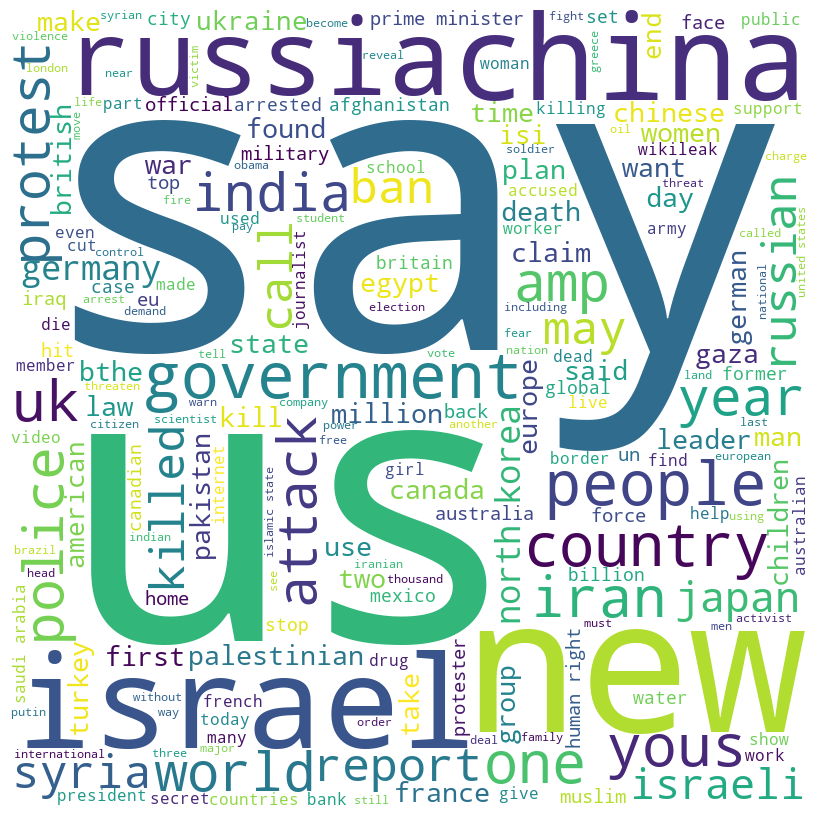

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned headlines into a single string
text = ' '.join([' '.join(headlines) for headlines in cleaned_headlines])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## Word Embedding
<p><b>We would Stanford Pre-trained word vectors. Now we are going to use GloVe embedding to initialize the weight for each word</b></p>

In [37]:
embeddings_index={}
with open('Dataset\glove.840B.300d.txt',encoding='utf-8') as f:
    for line in f:
        values=line.split(' ')
        word=values[0]
        embedding=np.asarray(values[1:],dtype='float32')
        embeddings_index[word]=embedding
        
print('Word embeddings:',len(embeddings_index))

Word embeddings: 2196017


In [38]:
#Limiting our vocabulary, so that if we have a word that is very rare we can remove it

#Defining the limit
threshold=10

# dictionary to convert words to integers
vocab_to_int={}

value=0
for word,count in words_counts.items():
    if count>=threshold or word in embeddings_index:
        vocab_to_int[word]= value
        value +=1

In [33]:
#vocab_to_int

In [39]:
print('Original size of Vocabulary: ',len(words_counts))
print('New size of Vocabulary: ',len(vocab_to_int))

Original size of Vocabulary:  42977
New size of Vocabulary:  32458


In [40]:
# Special tokens that will be added to our vocab
#<UNK> is used to deal with unknown words that are not in the dictionary
#<PAD> Padding was performed so the shorter sentences are equal in length with the longer issues(Issues faced while modelling)
tokens= ["<UNK>","<PAD>"]

# Add codes to vocab
for token in tokens:
    vocab_to_int[token]= len(vocab_to_int)
    
# Dictionary to convert integers to words
int_to_vocab={}
for word, value in vocab_to_int.items():
    int_to_vocab[value]= word


print("Total number of Unique Words:", len(words_counts))
print("Number of words we will use:", len(vocab_to_int))

Total number of Unique Words: 42977
Number of words we will use: 32460


In [41]:
#As we have imported Glove embedding with 300 dimension so below we are just setting 300 for embedding dimension to match
#Glove vectors
embedding_dim=300

matrixSize= len(vocab_to_int)

# Create matrix with default values of zero
word_embedding_matrix = np.zeros((matrixSize,embedding_dim)) #(32460,300)
for word, i in vocab_to_int.items():
    if word in embeddings_index:
        word_embedding_matrix[i]= embeddings_index[word]
    else:
        # If word not in GloVe, create a random embedding for it
        new_embedding= np.array(np.random.uniform(-1.0,1.0,embedding_dim))
        embeddings_index[word]= new_embedding
        word_embedding_matrix[i]= new_embedding
        
# Check if value matches len(vocab_to_int)
print(len(word_embedding_matrix))

32460


In [42]:
# Change the text from words to integers
# If word is not in vocab, replace it with <UNK> (unknown)
word_count = 0
unk_count = 0

headlines_sequence = []

for daily_headline in cleaned_headlines:
    daily_headlines_seq = []
    for headline in daily_headline:
        headline_seq = []
        for word in headline.split():
            word_count += 1
            if word in vocab_to_int:
                headline_seq.append(vocab_to_int[word])
            else:
                headline_seq.append(vocab_to_int["<UNK>"])
                unk_count += 1
        daily_headlines_seq.append(headline_seq)
    headlines_sequence.append(daily_headlines_seq)

unk_percent = round(unk_count/word_count,4)*100

print("Total number of words in headlines:", word_count)
print("Total number of UNKs in headlines:", unk_count)
print("Percent of words that are UNK: {}%".format(unk_percent))

Total number of words in headlines: 590861
Total number of UNKs in headlines: 15186
Percent of words that are UNK: 2.5700000000000003%


In [43]:
nb_words=len(vocab_to_int)
print(nb_words)

32460


In [38]:
#headlines_sequence[1]

In [44]:
#Limit the length of a day's news to 200 words, and the length of any headline to 16 words. 
#These values are chosen to not have an excessively long training time and balance the number of headlines 
#used and the number of words from each headline.
#Also performing Padding

max_headline_len = 16
max_daily_len = 200
padded_headlines = []

for daily_headlines in headlines_sequence:
    padded_daily_headlines = []
    
    for headline in daily_headlines:
        words = headline[:max_headline_len]  # Limit headline if it is more than max length
        padded_daily_headlines.extend(words) #adding multipe words at once to padded_daily_headlines
    
    pad_len = max(0, max_daily_len - len(padded_daily_headlines)) #max call to calculate pad_length so that it will never be negative
    padded_daily_headlines.extend([vocab_to_int["<PAD>"]] * pad_len)
    padded_headlines.append(padded_daily_headlines[:max_daily_len])


In [468]:
#padded_headlines[1]

## Dividing data into Train/Test sets

In [47]:
#Splitting data into Training and Testing sets
from sklearn.model_selection import train_test_split

#Dividing data into train and test
X_train, X_test, y_train, y_test = train_test_split(padded_headlines, price_norm, test_size = 0.30, random_state = 42)

#train.shape,test.shape
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#Printing shape
#Training
print("Training Dataset Shape :",(X_train.shape,y_train.shape))
#Testing
print("Testing Dataset Shape :",(X_test.shape,y_test.shape))
print()

#Dividing training set into two parts -> training and validation(test set is going to be kept completely separate)
train_X,val_X,train_y,val_y = train_test_split(X_train, y_train, test_size=0.3, random_state=43)
#printing the shape of above variables after train/test split
print("Train_X Shape: ",train_X.shape)
print("Val_X Shape: ",val_X.shape)
print("Train_y Shape: ",train_y.shape)
print("Val_y Shape: ",val_y.shape)
print()

Training Dataset Shape : ((1391, 200), (1391,))
Testing Dataset Shape : ((597, 200), (597,))

Train_X Shape:  (973, 200)
Val_X Shape:  (418, 200)
Train_y Shape:  (973,)
Val_y Shape:  (418,)



# Modelling 

## 1D Convolutional Neural Network  

In [317]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [318]:
#importing libraries
from tensorflow.python import keras #the keras library makes it easier for us to implement CNN because it has different models and layers that later on we are going to use
from tensorflow.python.keras.models import Input  
from keras.layers import Embedding,Dense,Conv1D,Bidirectional,LSTM,GRU,Conv2D,Activation,MaxPooling2D,Flatten,Dropout,BatchNormalization,LeakyReLU,GlobalMaxPooling1D #importing different layers that we are going to use for building our network
from keras.utils import to_categorical #using this library to convert our test_y and train_y to categ
import keras
from keras.models import Sequential,Model
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape


In [319]:
#parameters for the below model
epochs = 50

#initializing the model
model = Sequential()
#Adding the embedding layer which will take in 32460 as input and provide a 300 dimensional output of those words which 
#will basically map information from higher dimension(word_embedding_matrix) with the dimension(32460,300) to a lower dimension allowing it to learn data more efficiently
#nb_words=32460 total words that we are gonna use after cleaning
#embedding_dim=300
#input_lenth=200 total length of our daily news
model.add(Embedding(nb_words,embedding_dim,weights=[word_embedding_matrix],input_length=200))
#adding a dropout layer with a rate of 0.5
model.add(Dropout(0.5))
#adding first Conv2D layer with 16 filters,with kernel_size(5) which is basically that the filter is going to be passed over the training data in 1 direction
#using relu activation func, with padding=same which will the size of the output same as input
model.add(Conv1D(16, kernel_size=5,activation='relu',padding='same'))
#adding a dropout layer with a rate of 0.5
model.add(Dropout(0.5))
#adding 2nd Conv2D layer with 128 filters,with kernel_size(5) which is basically that the filter is going to be passed over the training data in 1 direction
#using relu activation func, with padding=same which will the size of the output same as input
model.add(Conv1D(128, kernel_size=5,activation='relu',padding='same'))
model.add(GlobalMaxPooling1D())
#adding a dropout layer with a rate of 0.5
model.add(Dropout(0.5))
#defining the Dense layer, 128 the the size of the output which basically represents the dimenionality of the output vector
#the activation function is relu. The activation function is basically used for the transformation of the input values
model.add(Dense(128, activation='relu'))
#adding the last layer
model.add(Dense(1))

In [320]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          9738000   
                                                                 
 dropout (Dropout)           (None, 200, 300)          0         
                                                                 
 conv1d (Conv1D)             (None, 200, 16)           24016     
                                                                 
 dropout_1 (Dropout)         (None, 200, 16)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 200, 128)          10368     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                        

In [321]:
#compiling the model

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='Adam')

In [322]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce
#Batch Size 128
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)
history = model.fit(train_X, train_y, batch_size=128,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop])

Epoch 1/50
8/8 [==============================] - 5s 444ms/step - loss: 0.0456 - val_loss: 0.0078
Epoch 2/50
8/8 [==============================] - 3s 393ms/step - loss: 0.0212 - val_loss: 0.0077
Epoch 3/50
8/8 [==============================] - 3s 380ms/step - loss: 0.0150 - val_loss: 0.0076
Epoch 4/50
8/8 [==============================] - 3s 387ms/step - loss: 0.0110 - val_loss: 0.0078
Epoch 5/50
8/8 [==============================] - 3s 400ms/step - loss: 0.0099 - val_loss: 0.0077
Epoch 6/50
8/8 [==============================] - 3s 401ms/step - loss: 0.0089 - val_loss: 0.0081
Epoch 7/50
8/8 [==============================] - 3s 394ms/step - loss: 0.0088 - val_loss: 0.0081
Epoch 8/50
8/8 [==============================] - 3s 400ms/step - loss: 0.0085 - val_loss: 0.0080


In [323]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 1s 17ms/step


In [329]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))
print("MAPE :",mape(y_test,prediction))#anything below 5% is better

Mean Squared Error : 0.006483865473216662
Mean Absolute Error : 0.05541928096832296
MAPE : 0.1443769704556449


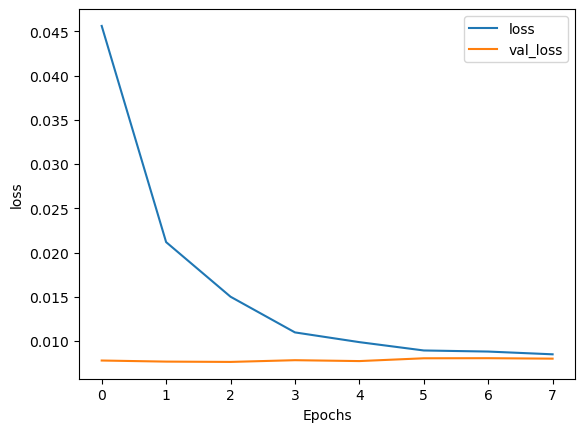

In [325]:
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plot_graphs(history, "loss")

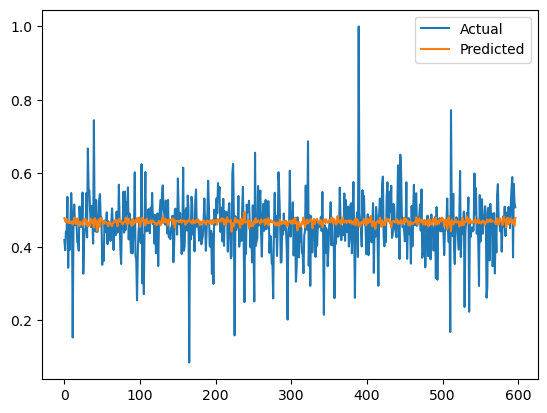

In [326]:
# plot the predicted prices against actual prices
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Predicted')
plt.legend()
plt.show()

## Batch Size

In [779]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce
#Batch Size 32
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)
history = model.fit(train_X, train_y, batch_size=32,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop])

Epoch 1/50
31/31 [==============================] - 10s 248ms/step - loss: 0.0283 - val_loss: 0.0094
Epoch 2/50
31/31 [==============================] - 7s 216ms/step - loss: 0.0112 - val_loss: 0.0078
Epoch 3/50
31/31 [==============================] - 7s 240ms/step - loss: 0.0096 - val_loss: 0.0087
Epoch 4/50
31/31 [==============================] - 7s 233ms/step - loss: 0.0084 - val_loss: 0.0088
Epoch 5/50
31/31 [==============================] - 7s 233ms/step - loss: 0.0086 - val_loss: 0.0084
Epoch 6/50
31/31 [==============================] - 7s 231ms/step - loss: 0.0079 - val_loss: 0.0082
Epoch 7/50
31/31 [==============================] - 7s 231ms/step - loss: 0.0082 - val_loss: 0.0081


In [780]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 0s 16ms/step


In [781]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))

Mean Squared Error : 0.006693802833737516
Mean Absolute Error : 0.05748573059093716


In [782]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce
#Batch Size 64
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)
history = model.fit(train_X, train_y, batch_size=64,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop])

Epoch 1/50
16/16 [==============================] - 5s 305ms/step - loss: 0.0095 - val_loss: 0.0082
Epoch 2/50
16/16 [==============================] - 5s 307ms/step - loss: 0.0088 - val_loss: 0.0083
Epoch 3/50
16/16 [==============================] - 5s 283ms/step - loss: 0.0082 - val_loss: 0.0083
Epoch 4/50
16/16 [==============================] - 4s 274ms/step - loss: 0.0081 - val_loss: 0.0084
Epoch 5/50
16/16 [==============================] - 5s 296ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 6/50
16/16 [==============================] - 5s 291ms/step - loss: 0.0081 - val_loss: 0.0082
Epoch 7/50
16/16 [==============================] - 4s 276ms/step - loss: 0.0078 - val_loss: 0.0081
Epoch 8/50
16/16 [==============================] - 5s 286ms/step - loss: 0.0076 - val_loss: 0.0082
Epoch 9/50
16/16 [==============================] - 5s 298ms/step - loss: 0.0077 - val_loss: 0.0081
Epoch 10/50
16/16 [==============================] - 5s 286ms/step - loss: 0.0076 - val_loss: 0.0080

In [783]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 1s 24ms/step


In [784]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))

Mean Squared Error : 0.006555553437630621
Mean Absolute Error : 0.05649839895810895


In [785]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce
#Batch Size 256
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)
history = model.fit(train_X, train_y, batch_size=256,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop])

Epoch 1/50
4/4 [==============================] - 3s 785ms/step - loss: 0.0075 - val_loss: 0.0078
Epoch 2/50
4/4 [==============================] - 3s 728ms/step - loss: 0.0074 - val_loss: 0.0079
Epoch 3/50
4/4 [==============================] - 3s 715ms/step - loss: 0.0076 - val_loss: 0.0080
Epoch 4/50
4/4 [==============================] - 3s 721ms/step - loss: 0.0074 - val_loss: 0.0080
Epoch 5/50
4/4 [==============================] - 3s 709ms/step - loss: 0.0075 - val_loss: 0.0079
Epoch 6/50
4/4 [==============================] - 3s 739ms/step - loss: 0.0074 - val_loss: 0.0079


In [786]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 1s 29ms/step


In [787]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))

Mean Squared Error : 0.006578623142404279
Mean Absolute Error : 0.05668427395943444


<b>So best batch size 128 with the lowest MSE 0.0063</b>

## Optimizer 

In [789]:
#Optimizer=RMSProp

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='RMSProp')

In [790]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce
#Batch Size 128
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)
history = model.fit(train_X, train_y, batch_size=128,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop])

Epoch 1/50
8/8 [==============================] - 5s 429ms/step - loss: 0.0077 - val_loss: 0.0080
Epoch 2/50
8/8 [==============================] - 3s 424ms/step - loss: 0.0074 - val_loss: 0.0079
Epoch 3/50
8/8 [==============================] - 3s 431ms/step - loss: 0.0075 - val_loss: 0.0081
Epoch 4/50
8/8 [==============================] - 3s 437ms/step - loss: 0.0074 - val_loss: 0.0082
Epoch 5/50
8/8 [==============================] - 4s 453ms/step - loss: 0.0076 - val_loss: 0.0080
Epoch 6/50
8/8 [==============================] - 4s 453ms/step - loss: 0.0074 - val_loss: 0.0079
Epoch 7/50
8/8 [==============================] - 3s 397ms/step - loss: 0.0074 - val_loss: 0.0079
Epoch 8/50
8/8 [==============================] - 3s 429ms/step - loss: 0.0074 - val_loss: 0.0080
Epoch 9/50
8/8 [==============================] - 3s 426ms/step - loss: 0.0073 - val_loss: 0.0079
Epoch 10/50
8/8 [==============================] - 3s 442ms/step - loss: 0.0075 - val_loss: 0.0080
Epoch 11/50
8/8 [==

In [791]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 1s 28ms/step


In [792]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))

Mean Squared Error : 0.006702153809750521
Mean Absolute Error : 0.05744359982655519


In [793]:
#Optimizer=SGD

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='SGD')

In [794]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce
#Batch Size 128
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)
history = model.fit(train_X, train_y, batch_size=128,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop])

Epoch 1/50
8/8 [==============================] - 5s 405ms/step - loss: 0.0076 - val_loss: 0.0079
Epoch 2/50
8/8 [==============================] - 3s 372ms/step - loss: 0.0075 - val_loss: 0.0079
Epoch 3/50
8/8 [==============================] - 3s 360ms/step - loss: 0.0076 - val_loss: 0.0079
Epoch 4/50
8/8 [==============================] - 3s 372ms/step - loss: 0.0076 - val_loss: 0.0079
Epoch 5/50
8/8 [==============================] - 3s 368ms/step - loss: 0.0075 - val_loss: 0.0079
Epoch 6/50
8/8 [==============================] - 3s 374ms/step - loss: 0.0075 - val_loss: 0.0079


In [795]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 0s 17ms/step


In [796]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))

Mean Squared Error : 0.006713683846847118
Mean Absolute Error : 0.05753624887975911


In [797]:
#Optimizer=Adagrad

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='Adagrad')

In [798]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce
#Batch Size 128
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)
history = model.fit(train_X, train_y, batch_size=128,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop])

Epoch 1/50
8/8 [==============================] - 5s 399ms/step - loss: 0.0075 - val_loss: 0.0079
Epoch 2/50
8/8 [==============================] - 3s 347ms/step - loss: 0.0075 - val_loss: 0.0079
Epoch 3/50
8/8 [==============================] - 3s 343ms/step - loss: 0.0074 - val_loss: 0.0079
Epoch 4/50
8/8 [==============================] - 3s 355ms/step - loss: 0.0076 - val_loss: 0.0079
Epoch 5/50
8/8 [==============================] - 3s 344ms/step - loss: 0.0075 - val_loss: 0.0079
Epoch 6/50
8/8 [==============================] - 3s 357ms/step - loss: 0.0076 - val_loss: 0.0079


In [799]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 1s 16ms/step


In [800]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))

Mean Squared Error : 0.006717111792177761
Mean Absolute Error : 0.05756351076632384


<b>No major improvement by changing the optimizers so we'll go ahead with 'Adam'</b>

### Modelling 1D CNN with the best hyperparameters

1st Conv1D layer -> 32 ------- 2nd Conv2D layer -> 64

In [330]:
#parameters for the below model
epochs = 50

#initializing the model
model = Sequential()
#Adding the embedding layer which will take in 32460 as input and provide a 300 dimensional output of those words which 
#will basically map information from higher dimension(word_embedding_matrix) with the dimension(32460,300) to a lower dimension allowing it to learn data more efficiently
#nb_words=32460 total words that we are gonna use after cleaning
#embedding_dim=300
#input_lenth=200 total length of our daily news
model.add(Embedding(nb_words,embedding_dim,weights=[word_embedding_matrix],input_length=200))
#adding first Conv2D layer with 32 filters,with kernel_size(5) which is basically that the filter is going to be passed over the training data in 1 direction
#using relu activation func, with padding=same which will the size of the output same as input
model.add(Conv1D(32, kernel_size=5,activation='relu',padding='same'))
#adding 2nd Conv2D layer with 64 filters,with kernel_size(5) which is basically that the filter is going to be passed over the training data in 1 direction
#using relu activation func, with padding=same which will the size of the output same as input
model.add(Conv1D(64, kernel_size=5,activation='relu',padding='same'))
model.add(GlobalMaxPooling1D())
#defining the Dense layer, 128 the the size of the output which basically represents the dimenionality of the output vector
#the activation function is relu. The activation function is basically used for the transformation of the input values
model.add(Dense(64, activation='relu'))
#adding the last layer
model.add(Dense(1))

In [331]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 300)          9738000   
                                                                 
 conv1d_2 (Conv1D)           (None, 200, 32)           48032     
                                                                 
 conv1d_3 (Conv1D)           (None, 200, 64)           10304     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                      

In [332]:
#compiling the model

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='Adam')

In [333]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce
#Batch Size 128
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)
history = model.fit(train_X, train_y, batch_size=128,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop])

Epoch 1/50
8/8 [==============================] - 8s 385ms/step - loss: 0.0121 - val_loss: 0.0113
Epoch 2/50
8/8 [==============================] - 3s 351ms/step - loss: 0.0065 - val_loss: 0.0088
Epoch 3/50
8/8 [==============================] - 3s 364ms/step - loss: 0.0042 - val_loss: 0.0080
Epoch 4/50
8/8 [==============================] - 3s 362ms/step - loss: 0.0024 - val_loss: 0.0080
Epoch 5/50
8/8 [==============================] - 3s 360ms/step - loss: 0.0013 - val_loss: 0.0080
Epoch 6/50
8/8 [==============================] - 3s 348ms/step - loss: 5.9246e-04 - val_loss: 0.0080
Epoch 7/50
8/8 [==============================] - 3s 348ms/step - loss: 2.7975e-04 - val_loss: 0.0081
Epoch 8/50
8/8 [==============================] - 3s 343ms/step - loss: 1.3941e-04 - val_loss: 0.0082
Epoch 9/50
8/8 [==============================] - 3s 335ms/step - loss: 8.3189e-05 - val_loss: 0.0082
Epoch 10/50
8/8 [==============================] - 3s 352ms/step - loss: 5.5007e-05 - val_loss: 0.0082

In [334]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 0s 11ms/step


In [335]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))
print("MAPE :",mape(y_test,prediction))#anything below 5% is better

Mean Squared Error : 0.006655646566935872
Mean Absolute Error : 0.05704153580993376
MAPE : 0.14685374888109673


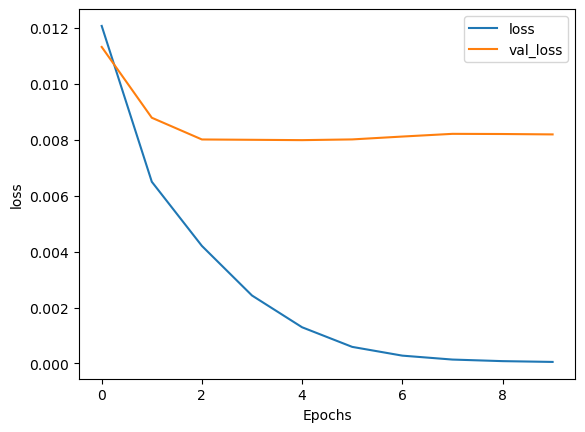

In [336]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plot_graphs(history, "loss")

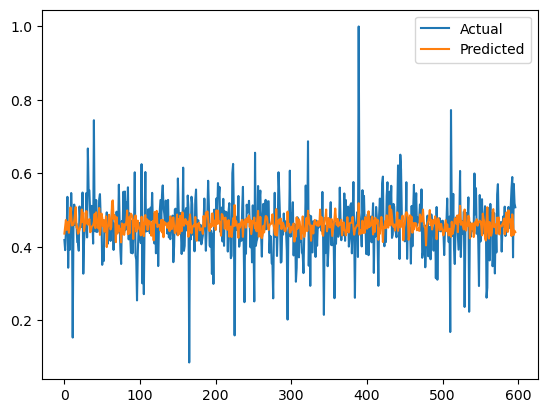

In [337]:
# plot the predicted prices against actual prices
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Predicted')
plt.legend()
plt.show()

## Best and Baseline 1D CNN model

In [338]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

<b>1st Conv1D layer -> 64 ------- 2nd Conv2D layer -> 128<b>

In [339]:
#parameters for the below model
epochs = 50

#initializing the model
model = Sequential()
#Adding the embedding layer which will take in 32460 as input and provide a 300 dimensional output of those words which 
#will basically map information from higher dimension(word_embedding_matrix) with the dimension(32460,300) to a lower dimension allowing it to learn data more efficiently
#nb_words=32460 total words that we are gonna use after cleaning
#embedding_dim=300
#input_lenth=200 total length of our daily news
model.add(Embedding(nb_words,embedding_dim,weights=[word_embedding_matrix],input_length=200))
#adding first Conv2D layer with 64 filters,with kernel_size(5) which is basically that the filter is going to be passed over the training data in 1 direction
#using relu activation func, with padding=same which will the size of the output same as input
model.add(Conv1D(64, kernel_size=5,activation='relu',padding='same'))
#adding 2nd Conv2D layer with 128 filters,with kernel_size(5) which is basically that the filter is going to be passed over the training data in 1 direction
#using relu activation func, with padding=same which will the size of the output same as input
model.add(Conv1D(128, kernel_size=5,activation='relu',padding='same'))
model.add(GlobalMaxPooling1D())
#defining the Dense layer, 128 the the size of the output which basically represents the dimenionality of the output vector
#the activation function is relu. The activation function is basically used for the transformation of the input values
model.add(Dense(128, activation='relu'))
#adding the last layer
model.add(Dense(1))

In [340]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          9738000   
                                                                 
 conv1d (Conv1D)             (None, 200, 64)           96064     
                                                                 
 conv1d_1 (Conv1D)           (None, 200, 128)          41088     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                        

In [341]:
#compiling the model

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam 
model.compile(loss='mean_squared_error', optimizer='Adam')

In [342]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce
#Batch Size 128
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)
history = model.fit(train_X, train_y, batch_size=128,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop])

Epoch 1/50
8/8 [==============================] - 5s 456ms/step - loss: 0.0218 - val_loss: 0.0106
Epoch 2/50
8/8 [==============================] - 3s 416ms/step - loss: 0.0078 - val_loss: 0.0075
Epoch 3/50
8/8 [==============================] - 3s 419ms/step - loss: 0.0054 - val_loss: 0.0075
Epoch 4/50
8/8 [==============================] - 3s 412ms/step - loss: 0.0033 - val_loss: 0.0074
Epoch 5/50
8/8 [==============================] - 3s 422ms/step - loss: 0.0019 - val_loss: 0.0076
Epoch 6/50
8/8 [==============================] - 3s 417ms/step - loss: 9.7640e-04 - val_loss: 0.0076
Epoch 7/50
8/8 [==============================] - 3s 407ms/step - loss: 4.2995e-04 - val_loss: 0.0076
Epoch 8/50
8/8 [==============================] - 3s 439ms/step - loss: 1.7112e-04 - val_loss: 0.0076
Epoch 9/50
8/8 [==============================] - 3s 424ms/step - loss: 9.9643e-05 - val_loss: 0.0076


In [343]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 0s 17ms/step


In [344]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))
print("MAPE :",mape(y_test,prediction))#anything below 5% is better

Mean Squared Error : 0.006368493765710934
Mean Absolute Error : 0.05516861597087455
MAPE : 0.13885212932287136


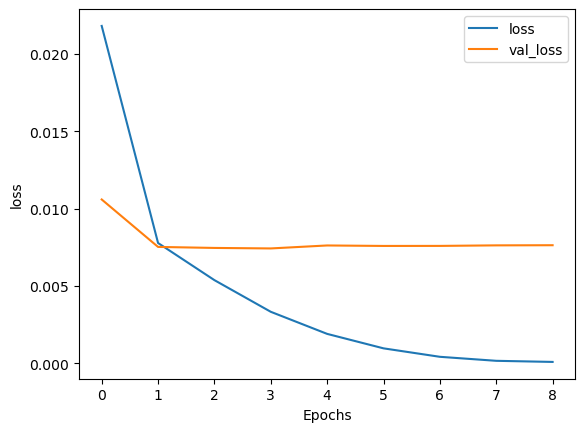

In [345]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plot_graphs(history, "loss")

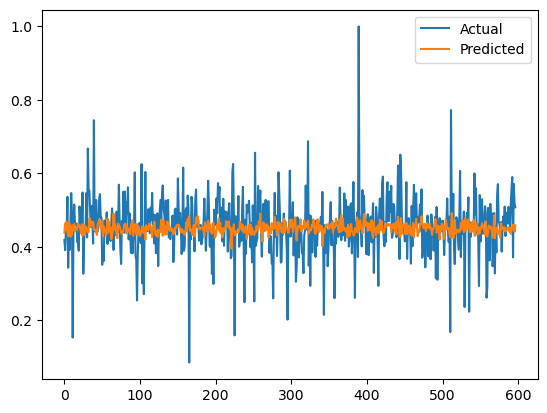

In [346]:
# plot the predicted prices against actual prices
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Predicted')
plt.legend()
plt.show()

## Recurrent Neural Network 
<p>Bidirectional RNNs: These are RNNs that process the input sequence in both forward and backward directions, allowing them to capture context from both past and future inputs. They are particularly useful in applications where the entire input sequence is available at once, such as speech recognition or language modeling.</p>

In [347]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

## with Dropout 

In [348]:
#parameters for the below model
epochs = 50

#initializing the model
model = Sequential()
#Adding the embedding layer which will take in 32460 as input and provide a 300 dimensional output of those words which 
#will basically map information from higher dimension(word_embedding_matrix) with the dimension(32460,300) to a lower dimension allowing it to learn data more efficiently
#nb_words=32460 total words that we are gonna use after cleaning
#embedding_dim=300
#input_lenth=200 total length of our daily news
model.add(Embedding(nb_words,embedding_dim,weights=[word_embedding_matrix],input_length=200))
#adding a dropout layer with a rate of 0.5
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, dropout=0.5,return_sequences=True)))
model.add(Bidirectional(LSTM(64, dropout=0.5)))
#defining the Dense layer, 128 the the size of the output which basically represents the dimenionality of the output vector
#the activation function is relu. The activation function is basically used for the transformation of the input values
model.add(Dense(128, activation='relu'))
#adding the last layer
model.add(Dense(1, activation='sigmoid'))

In [349]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          9738000   
                                                                 
 dropout (Dropout)           (None, 200, 300)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 200, 128)         186880    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 1

In [350]:
#compiling the model

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='Adam')

In [351]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)
history = model.fit(train_X, train_y, batch_size=128,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop])

Epoch 1/50
8/8 [==============================] - 47s 5s/step - loss: 0.0081 - val_loss: 0.0075
Epoch 2/50
8/8 [==============================] - 38s 5s/step - loss: 0.0073 - val_loss: 0.0079
Epoch 3/50
8/8 [==============================] - 38s 5s/step - loss: 0.0073 - val_loss: 0.0076
Epoch 4/50
8/8 [==============================] - 39s 5s/step - loss: 0.0070 - val_loss: 0.0076
Epoch 5/50
8/8 [==============================] - 40s 5s/step - loss: 0.0069 - val_loss: 0.0077
Epoch 6/50
8/8 [==============================] - 37s 5s/step - loss: 0.0069 - val_loss: 0.0077


In [352]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 9s 363ms/step


In [353]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))
print("MAPE :",mape(y_test,prediction))#anything below 5% is better

Mean Squared Error : 0.006277713259453075
Mean Absolute Error : 0.054717502338588096
MAPE : 0.138934697416735


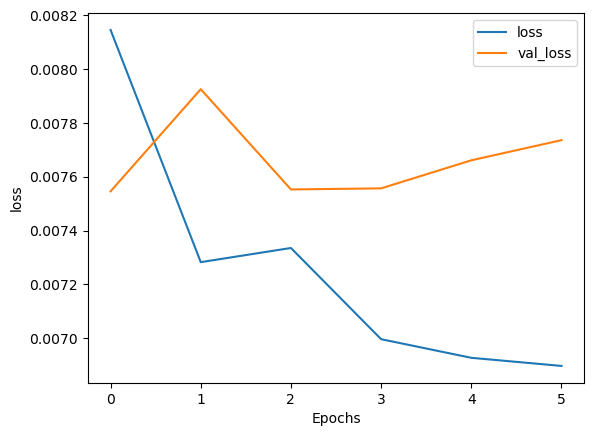

In [354]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plot_graphs(history, "loss")

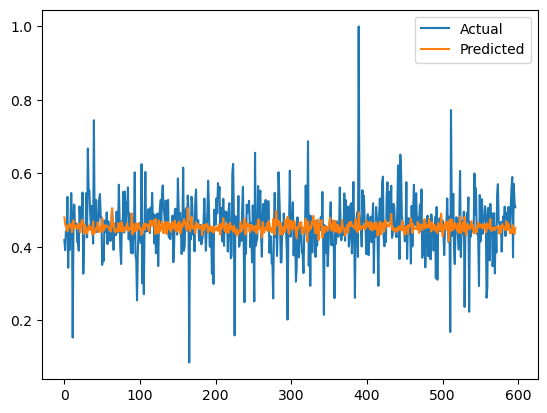

In [355]:
# plot the predicted prices against actual prices
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Predicted')
plt.legend()
plt.show()

In [357]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

## without Dropout 

In [358]:
#parameters for the below model
epochs = 50

#initializing the model
model = Sequential()
#Adding the embedding layer which will take in 32460 as input and provide a 300 dimensional output of those words which 
#will basically map information from higher dimension(word_embedding_matrix) with the dimension(32460,300) to a lower dimension allowing it to learn data more efficiently
#nb_words=32460 total words that we are gonna use after cleaning
#embedding_dim=300
#input_lenth=200 total length of our daily news
model.add(Embedding(nb_words,embedding_dim,weights=[word_embedding_matrix],input_length=200))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          9738000   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 256)         439296    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 200, 128)         164352    
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 64)                1638464   
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [359]:
#compiling the model

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='adam')

In [360]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)
history = model.fit(train_X, train_y, batch_size=128,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop])

Epoch 1/50
8/8 [==============================] - 69s 8s/step - loss: 15.3382 - val_loss: 0.2145
Epoch 2/50
8/8 [==============================] - 59s 7s/step - loss: 0.2151 - val_loss: 0.2144
Epoch 3/50
8/8 [==============================] - 60s 8s/step - loss: 0.2146 - val_loss: 0.2134
Epoch 4/50
8/8 [==============================] - 57s 7s/step - loss: 0.2134 - val_loss: 0.2120
Epoch 5/50
8/8 [==============================] - 57s 7s/step - loss: 0.2119 - val_loss: 0.2103
Epoch 6/50
8/8 [==============================] - 58s 7s/step - loss: 0.2101 - val_loss: 0.2084
Epoch 7/50
8/8 [==============================] - 58s 7s/step - loss: 0.2081 - val_loss: 0.2063
Epoch 8/50
8/8 [==============================] - 60s 8s/step - loss: 0.2059 - val_loss: 0.2040
Epoch 9/50
8/8 [==============================] - 58s 7s/step - loss: 0.2036 - val_loss: 0.2017
Epoch 10/50
8/8 [==============================] - 59s 8s/step - loss: 0.2013 - val_loss: 0.1993
Epoch 11/50
8/8 [=====================

In [361]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 11s 444ms/step


In [362]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))
print("MAPE :",mape(y_test,prediction))#anything below 5% is better

Mean Squared Error : 0.0919939135188792
Mean Absolute Error : 0.2932363158090432
MAPE : 0.6300089765571214


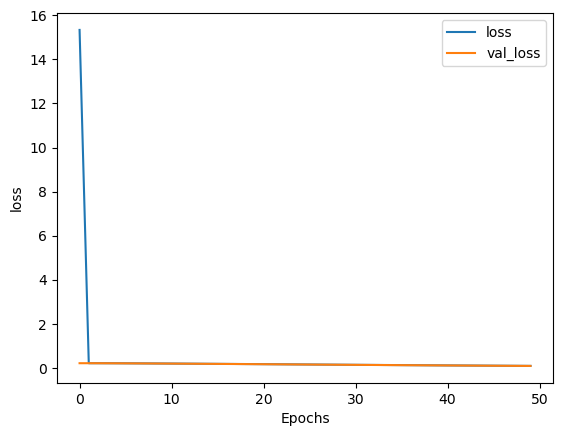

In [363]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plot_graphs(history, "loss")

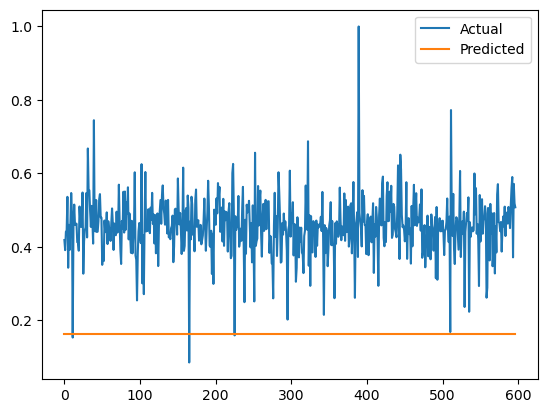

In [364]:
# plot the predicted prices against actual prices
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Predicted')
plt.legend()
plt.show()

In [128]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

## Using ReduceLROnPlateau to monitor the learning rate 

## Best Bidirectional LSTM Model 

In [316]:
#parameters for the below model
epochs = 50

#initializing the model
model = Sequential()
#Adding the embedding layer which will take in 32460 as input and provide a 300 dimensional output of those words which 
#will basically map information from higher dimension(word_embedding_matrix) with the dimension(32460,300) to a lower dimension allowing it to learn data more efficiently
#nb_words=32460 total words that we are gonna use after cleaning
#embedding_dim=300
#input_lenth=200 total length of our daily news
model.add(Embedding(nb_words,embedding_dim,weights=[word_embedding_matrix],input_length=200))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 300)          9738000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 200, 256)         439296    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 200, 128)         164352    
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 25600)             0         
                                                                 
 dense_1 (Dense)             (None, 64)                1638464   
                                                                 
 dense_2 (Dense)             (None, 1)                

In [130]:
#compiling the model

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='adam')

In [131]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce
#Using ReduceLROnPlateau to monitor the learning rate
from tensorflow.keras.callbacks import ReduceLROnPlateau

#Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)

history = model.fit(train_X, train_y, batch_size=128,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop,reduce_lr])

Epoch 1/50
8/8 [==============================] - 98s 10s/step - loss: 12.0261 - val_loss: 0.2141 - lr: 0.0010
Epoch 2/50
8/8 [==============================] - 84s 11s/step - loss: 0.1217 - val_loss: 0.0843 - lr: 0.0010
Epoch 3/50
8/8 [==============================] - 81s 11s/step - loss: 0.0417 - val_loss: 0.0390 - lr: 0.0010
Epoch 4/50
8/8 [==============================] - 89s 11s/step - loss: 0.0227 - val_loss: 0.0137 - lr: 0.0010
Epoch 5/50
8/8 [==============================] - 87s 11s/step - loss: 0.0140 - val_loss: 0.0093 - lr: 0.0010
Epoch 6/50
8/8 [==============================] - 84s 11s/step - loss: 0.0111 - val_loss: 0.0112 - lr: 0.0010
Epoch 7/50
8/8 [==============================] - 84s 11s/step - loss: 0.0092 - val_loss: 0.0095 - lr: 0.0010
Epoch 8/50
8/8 [==============================] - 89s 11s/step - loss: 0.0082 - val_loss: 0.0090 - lr: 0.0010
Epoch 9/50
8/8 [==============================] - 86s 11s/step - loss: 0.0074 - val_loss: 0.0090 - lr: 0.0010
Epoch 10/

In [132]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 11s 513ms/step


In [133]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))
print("MAPE :",mape(y_test,prediction))#anything below 5% is better

Mean Squared Error : 0.005677713259453075
Mean Absolute Error : 0.0482176043367877
MAPE : 0.10990393677514547


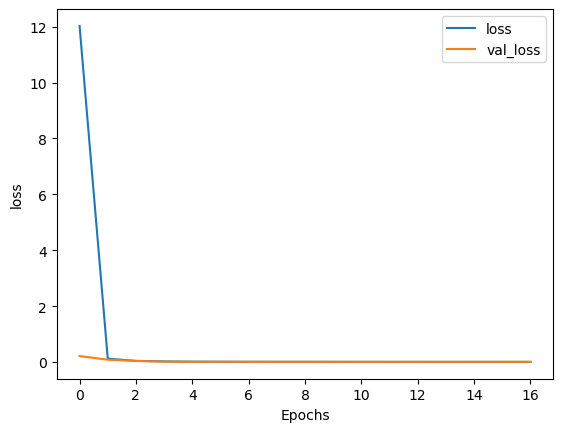

In [134]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plot_graphs(history, "loss")

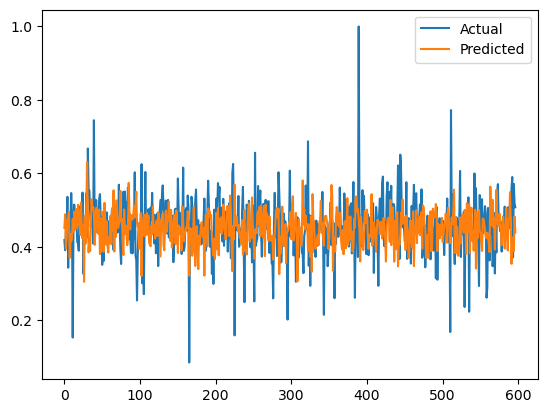

In [135]:
# plot the predicted prices against actual prices
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Predicted')
plt.legend()
plt.show()

## Further Experimenting

In [138]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

<b>1st Bidirectional LSTM Layer-> 128 -------- 2nd Bidirectional LSTM Layer->128</b>

In [139]:
#parameters for the below model
epochs = 50

#initializing the model
model = Sequential()
#Adding the embedding layer which will take in 32460 as input and provide a 300 dimensional output of those words which 
#will basically map information from higher dimension(word_embedding_matrix) with the dimension(32460,300) to a lower dimension allowing it to learn data more efficiently
#nb_words=32460 total words that we are gonna use after cleaning
#embedding_dim=300
#input_lenth=200 total length of our daily news
model.add(Embedding(nb_words,embedding_dim,weights=[word_embedding_matrix],input_length=200))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(128)))
model.add(Flatten())
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          9738000   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 256)         439296    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 10,571,793
Trainable params: 10,571,793
No

In [140]:
#compiling the model

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='adam')

In [142]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce
#Using ReduceLROnPlateau to monitor the learning rate
from tensorflow.keras.callbacks import ReduceLROnPlateau

#Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)

history = model.fit(train_X, train_y, batch_size=128,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop,reduce_lr])

Epoch 1/50
8/8 [==============================] - 98s 11s/step - loss: 0.1092 - val_loss: 0.0147 - lr: 0.0010
Epoch 2/50
8/8 [==============================] - 87s 11s/step - loss: 0.0221 - val_loss: 0.0180 - lr: 0.0010
Epoch 3/50
8/8 [==============================] - 97s 13s/step - loss: 0.0142 - val_loss: 0.0116 - lr: 0.0010
Epoch 4/50
8/8 [==============================] - 93s 12s/step - loss: 0.0083 - val_loss: 0.0108 - lr: 0.0010
Epoch 5/50
8/8 [==============================] - 93s 12s/step - loss: 0.0059 - val_loss: 0.0095 - lr: 0.0010
Epoch 6/50
8/8 [==============================] - 97s 13s/step - loss: 0.0044 - val_loss: 0.0095 - lr: 0.0010
Epoch 7/50
8/8 [==============================] - 95s 12s/step - loss: 0.0034 - val_loss: 0.0100 - lr: 0.0010
Epoch 8/50
8/8 [==============================] - 105s 14s/step - loss: 0.0027 - val_loss: 0.0099 - lr: 0.0010
Epoch 9/50
8/8 [==============================] - 96s 12s/step - loss: 0.0022 - val_loss: 0.0098 - lr: 0.0010
Epoch 10/

In [143]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 13s 619ms/step


In [144]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))
print("MAPE :",mape(y_test,prediction))#anything below 5% is better


Mean Squared Error : 0.008292295672748034
Mean Absolute Error : 0.06827583275274644
MAPE : 0.16740419690567282


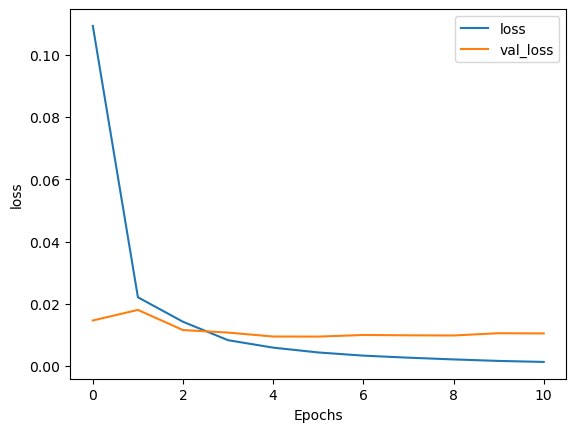

In [145]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plot_graphs(history, "loss")

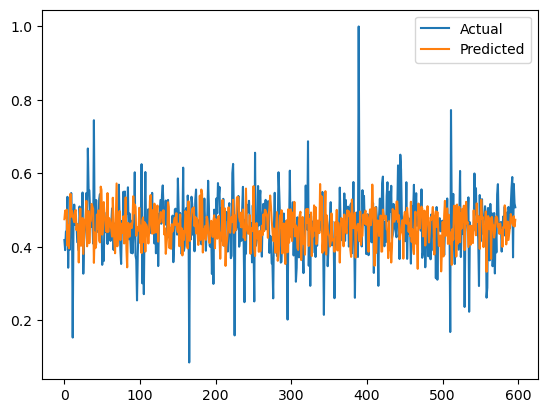

In [146]:
# plot the predicted prices against actual prices
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Predicted')
plt.legend()
plt.show()

In [147]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

<b>1st Bidirectional LSTM Layer-> 64 -------- 2nd Bidirectional LSTM Layer->64</b>

In [148]:
#parameters for the below model
epochs = 50

#initializing the model
model = Sequential()
#Adding the embedding layer which will take in 32460 as input and provide a 300 dimensional output of those words which 
#will basically map information from higher dimension(word_embedding_matrix) with the dimension(32460,300) to a lower dimension allowing it to learn data more efficiently
#nb_words=32460 total words that we are gonna use after cleaning
#embedding_dim=300
#input_lenth=200 total length of our daily news
model.add(Embedding(nb_words,embedding_dim,weights=[word_embedding_matrix],input_length=200))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Flatten())
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          9738000   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 128)         186880    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 10,023,825
Trainable params: 10,023,825
No

In [149]:
#compiling the model

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='adam')

In [150]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce
#Using ReduceLROnPlateau to monitor the learning rate
from tensorflow.keras.callbacks import ReduceLROnPlateau

#Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)

history = model.fit(train_X, train_y, batch_size=64,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop,reduce_lr])

Epoch 1/50
16/16 [==============================] - 30s 1s/step - loss: 0.0458 - val_loss: 0.0243 - lr: 0.0010
Epoch 2/50
16/16 [==============================] - 19s 1s/step - loss: 0.0118 - val_loss: 0.0122 - lr: 0.0010
Epoch 3/50
16/16 [==============================] - 19s 1s/step - loss: 0.0061 - val_loss: 0.0101 - lr: 0.0010
Epoch 4/50
16/16 [==============================] - 18s 1s/step - loss: 0.0039 - val_loss: 0.0101 - lr: 0.0010
Epoch 5/50
16/16 [==============================] - 18s 1s/step - loss: 0.0028 - val_loss: 0.0101 - lr: 0.0010
Epoch 6/50
16/16 [==============================] - 18s 1s/step - loss: 0.0018 - val_loss: 0.0106 - lr: 0.0010
Epoch 7/50
16/16 [==============================] - 19s 1s/step - loss: 0.0012 - val_loss: 0.0105 - lr: 0.0010
Epoch 8/50
16/16 [==============================] - 19s 1s/step - loss: 7.1212e-04 - val_loss: 0.0111 - lr: 0.0010
Epoch 9/50
16/16 [==============================] - 18s 1s/step - loss: 4.3953e-04 - val_loss: 0.0110 - lr: 

In [151]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 11s 409ms/step


In [152]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))
print("MAPE :",mape(y_test,prediction))#anything below 5% is better


Mean Squared Error : 0.009048928933884183
Mean Absolute Error : 0.07220272768973729
MAPE : 0.17040902468065525


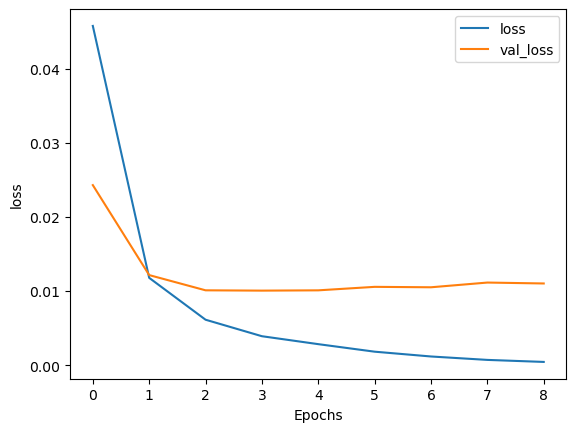

In [153]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plot_graphs(history, "loss")

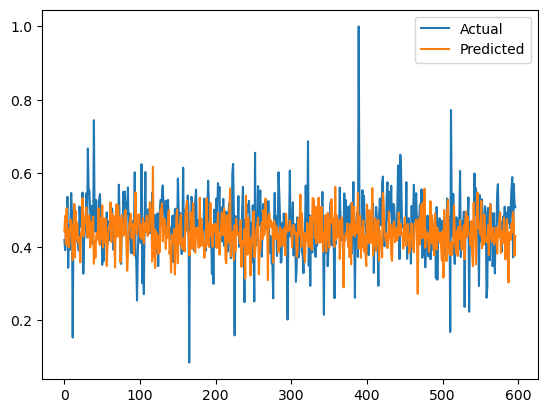

In [154]:
# plot the predicted prices against actual prices
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Predicted')
plt.legend()
plt.show()

In [98]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

<b>1st Bidirectional LSTM Layer-> 128 -------- 2nd Bidirectional LSTM Layer->64 ------ 3rd Bidirectional LSTM Layer -> 32</b>

In [99]:
#parameters for the below model
epochs = 50

#initializing the model
model = Sequential()
#Adding the embedding layer which will take in 32460 as input and provide a 300 dimensional output of those words which 
#will basically map information from higher dimension(word_embedding_matrix) with the dimension(32460,300) to a lower dimension allowing it to learn data more efficiently
#nb_words=32460 total words that we are gonna use after cleaning
#embedding_dim=300
#input_lenth=200 total length of our daily news
model.add(Embedding(nb_words,embedding_dim,weights=[word_embedding_matrix],input_length=200))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          9738000   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 256)         439296    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 200, 128)         164352    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 200, 64)          41216     
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                        

In [100]:
#compiling the model

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='adam')

In [101]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)
history = model.fit(train_X, train_y, batch_size=128,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop])

Epoch 1/50
8/8 [==============================] - 104s 11s/step - loss: 0.5725 - val_loss: 0.2114
Epoch 2/50
8/8 [==============================] - 77s 10s/step - loss: 0.2103 - val_loss: 0.2071
Epoch 3/50
8/8 [==============================] - 71s 9s/step - loss: 0.2056 - val_loss: 0.2019
Epoch 4/50
8/8 [==============================] - 79s 10s/step - loss: 0.2001 - val_loss: 0.1962
Epoch 5/50
8/8 [==============================] - 80s 10s/step - loss: 0.1944 - val_loss: 0.1905
Epoch 6/50
8/8 [==============================] - 80s 10s/step - loss: 0.1886 - val_loss: 0.1847
Epoch 7/50
8/8 [==============================] - 80s 10s/step - loss: 0.1828 - val_loss: 0.1789
Epoch 8/50
8/8 [==============================] - 85s 11s/step - loss: 0.1770 - val_loss: 0.1732
Epoch 9/50
8/8 [==============================] - 81s 10s/step - loss: 0.1714 - val_loss: 0.1676
Epoch 10/50
8/8 [==============================] - 79s 10s/step - loss: 0.1658 - val_loss: 0.1621
Epoch 11/50
8/8 [============

In [102]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 7s 266ms/step


In [103]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))

Mean Squared Error : 0.03376739172736755
Mean Absolute Error : 0.16987668044731735


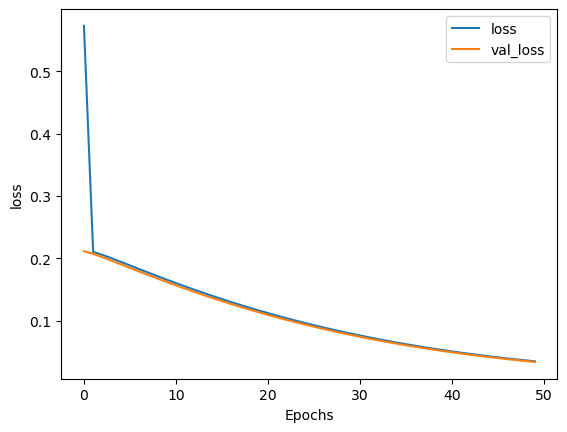

In [104]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plot_graphs(history, "loss")

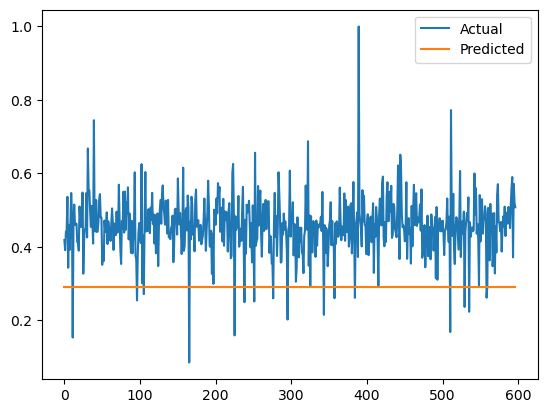

In [105]:
# plot the predicted prices against actual prices
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Predicted')
plt.legend()
plt.show()

## GRU 
<p>GRU (Gated Recurrent Units): GRUs are a simplified version of LSTMs that use fewer gates and are therefore computationally less expensive. They have been shown to be effective in a wide range of applications.</p>

In [365]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

<b>MODEL 1 = 1st GRU Layer -> 64 ------ 2nd GRU Layer -> 128</b>

In [366]:
#parameters for the below model
epochs = 50

#initializing the model
model = Sequential()
#Adding the embedding layer which will take in 32460 as input and provide a 300 dimensional output of those words which 
#will basically map information from higher dimension(word_embedding_matrix) with the dimension(32460,300) to a lower dimension allowing it to learn data more efficiently
#nb_words=32460 total words that we are gonna use after cleaning
#embedding_dim=300
#input_lenth=200 total length of our daily news
model.add(Embedding(nb_words,embedding_dim,weights=[word_embedding_matrix],input_length=200))
#adding a dropout layer with a rate of 0.5
model.add(Dropout(0.5))
model.add(GRU(64, dropout=0.5,return_sequences=True))
model.add(GRU(128, dropout=0.5))
#defining the Dense layer, 128 the the size of the output which basically represents the dimenionality of the output vector
#the activation function is relu. The activation function is basically used for the transformation of the input values
model.add(Dense(128, activation='relu'))
#adding the last layer
model.add(Dense(1, activation='sigmoid'))

In [367]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          9738000   
                                                                 
 dropout (Dropout)           (None, 200, 300)          0         
                                                                 
 gru (GRU)                   (None, 200, 64)           70272     
                                                                 
 gru_1 (GRU)                 (None, 128)               74496     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,899,409
Trainable params: 9,899,409
Non-

In [368]:
#compiling the model

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='Adam')

In [369]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)
history = model.fit(train_X, train_y, batch_size=128,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop])

Epoch 1/50
8/8 [==============================] - 27s 3s/step - loss: 0.0082 - val_loss: 0.0078
Epoch 2/50
8/8 [==============================] - 19s 2s/step - loss: 0.0078 - val_loss: 0.0075
Epoch 3/50
8/8 [==============================] - 21s 3s/step - loss: 0.0078 - val_loss: 0.0077
Epoch 4/50
8/8 [==============================] - 21s 3s/step - loss: 0.0074 - val_loss: 0.0075
Epoch 5/50
8/8 [==============================] - 20s 3s/step - loss: 0.0076 - val_loss: 0.0077
Epoch 6/50
8/8 [==============================] - 21s 3s/step - loss: 0.0074 - val_loss: 0.0078
Epoch 7/50
8/8 [==============================] - 21s 3s/step - loss: 0.0074 - val_loss: 0.0077


In [370]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 5s 215ms/step


In [371]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))
print("MAPE :",mape(y_test,prediction))#anything below 5% is better

Mean Squared Error : 0.006389006722447949
Mean Absolute Error : 0.055198210402505034
MAPE : 0.1413349338670918


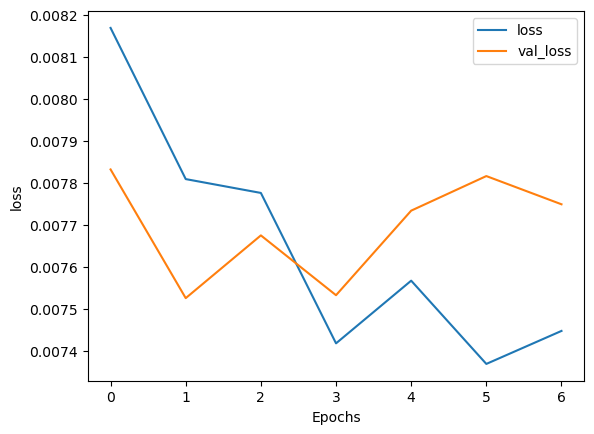

In [372]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plot_graphs(history, "loss")

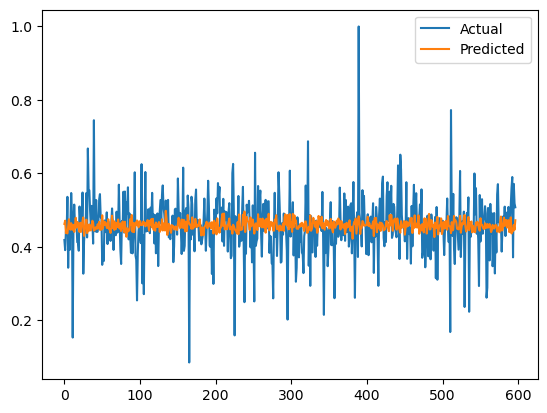

In [373]:
# plot the predicted prices against actual prices
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Predicted')
plt.legend()
plt.show()

In [374]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

## Best Model

<b>MODEL 2 = 1st GRU Layer -> 128 ------ 2nd GRU Layer -> 64</b>

In [375]:
#parameters for the below model
epochs = 50

#initializing the model
model = Sequential()
model.add(Embedding(nb_words,embedding_dim,weights=[word_embedding_matrix],input_length=200))
model.add(GRU(128,return_sequences=True))
model.add(GRU(64))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#adding the last layer
model.add(Dense(1, activation='sigmoid'))

In [376]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          9738000   
                                                                 
 gru (GRU)                   (None, 200, 128)          165120    
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,944,593
Trainable params: 9,944,593
Non-

In [377]:
#compiling the model

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='Adam')

In [378]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)
history = model.fit(train_X, train_y, batch_size=128,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop])

Epoch 1/50
8/8 [==============================] - 23s 2s/step - loss: 0.0085 - val_loss: 0.0080
Epoch 2/50
8/8 [==============================] - 18s 2s/step - loss: 0.0066 - val_loss: 0.0079
Epoch 3/50
8/8 [==============================] - 18s 2s/step - loss: 0.0056 - val_loss: 0.0080
Epoch 4/50
8/8 [==============================] - 19s 2s/step - loss: 0.0047 - val_loss: 0.0085
Epoch 5/50
8/8 [==============================] - 19s 2s/step - loss: 0.0038 - val_loss: 0.0085
Epoch 6/50
8/8 [==============================] - 19s 2s/step - loss: 0.0028 - val_loss: 0.0089
Epoch 7/50
8/8 [==============================] - 19s 2s/step - loss: 0.0023 - val_loss: 0.0095


In [379]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 3s 138ms/step


In [380]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))
print("MAPE :",mape(y_test,prediction))#anything below 5% is better

Mean Squared Error : 0.006602909305118808
Mean Absolute Error : 0.05726888751739947
MAPE : 0.14593239534011726


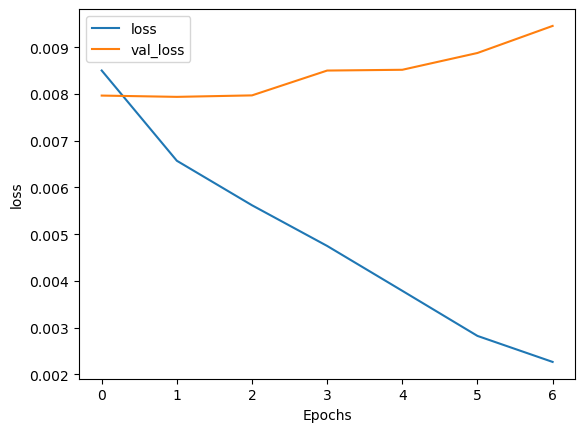

In [381]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plot_graphs(history, "loss")

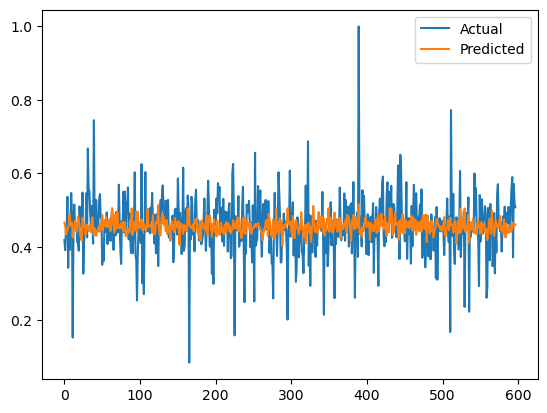

In [382]:
# plot the predicted prices against actual prices
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Predicted')
plt.legend()
plt.show()

## Hybrid Model 

### Model 1 - LSTM->GRU(Best uptill now)

In [294]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [295]:
#parameters for the below model
epochs = 50

#initializing the model
model = Sequential()
#Adding the embedding layer which will take in 32460 as input and provide a 300 dimensional output of those words which 
#will basically map information from higher dimension(word_embedding_matrix) with the dimension(32460,300) to a lower dimension allowing it to learn data more efficiently
#nb_words=32460 total words that we are gonna use after cleaning
#embedding_dim=300
#input_lenth=200 total length of our daily news
model.add(Embedding(nb_words,embedding_dim,weights=[word_embedding_matrix],input_length=200))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(GRU((64)))
model.add(Flatten())
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          9738000   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 256)         439296    
 l)                                                              
                                                                 
 gru (GRU)                   (None, 64)                61824     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 10,239,185
Trainable params: 10,239,185
Non-trainable params: 0
____________________________________________

In [296]:
#compiling the model

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='adam')

In [297]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce
#Using ReduceLROnPlateau to monitor the learning rate
from tensorflow.keras.callbacks import ReduceLROnPlateau

#Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)

history = model.fit(train_X, train_y, batch_size=64,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop,reduce_lr])

Epoch 1/50
16/16 [==============================] - 52s 3s/step - loss: 0.0509 - val_loss: 0.0190 - lr: 0.0010
Epoch 2/50
16/16 [==============================] - 46s 3s/step - loss: 0.0132 - val_loss: 0.0140 - lr: 0.0010
Epoch 3/50
16/16 [==============================] - 46s 3s/step - loss: 0.0076 - val_loss: 0.0116 - lr: 0.0010
Epoch 4/50
16/16 [==============================] - 45s 3s/step - loss: 0.0050 - val_loss: 0.0120 - lr: 0.0010
Epoch 5/50
16/16 [==============================] - 44s 3s/step - loss: 0.0035 - val_loss: 0.0113 - lr: 0.0010
Epoch 6/50
16/16 [==============================] - 44s 3s/step - loss: 0.0023 - val_loss: 0.0113 - lr: 0.0010
Epoch 7/50
16/16 [==============================] - 45s 3s/step - loss: 0.0017 - val_loss: 0.0114 - lr: 0.0010
Epoch 8/50
16/16 [==============================] - 44s 3s/step - loss: 0.0015 - val_loss: 0.0118 - lr: 0.0010
Epoch 9/50
16/16 [==============================] - 46s 3s/step - loss: 0.0012 - val_loss: 0.0118 - lr: 0.0010
E

In [298]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 6s 240ms/step


In [299]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))
print("MAPE :",mape(y_test,prediction))#anything below 5% is better

Mean Squared Error : 0.004937513239452835
Mean Absolute Error : 0.041491604384751975
MAPE : 0.08110372179374548


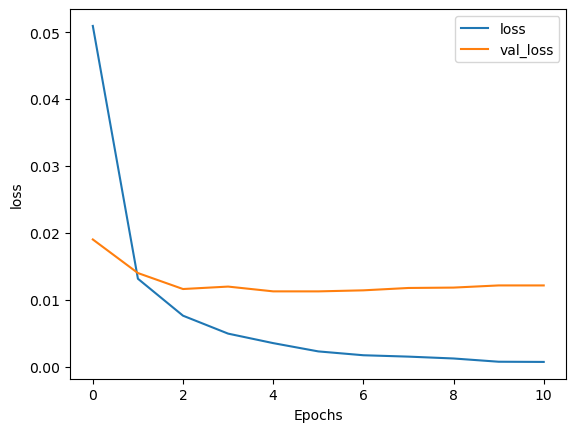

In [300]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plot_graphs(history, "loss")

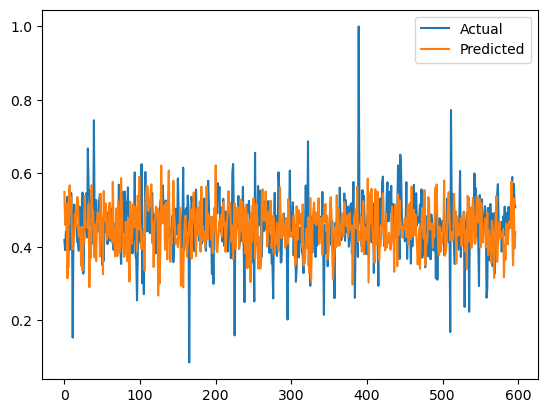

In [301]:
# plot the predicted prices against actual prices
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Predicted')
plt.legend()
plt.show()

### Model 2 - LSTM(128)->GRU(64)

In [174]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [175]:
#parameters for the below model
epochs = 50

#initializing the model
model = Sequential()
#Adding the embedding layer which will take in 32460 as input and provide a 300 dimensional output of those words which 
#will basically map information from higher dimension(word_embedding_matrix) with the dimension(32460,300) to a lower dimension allowing it to learn data more efficiently
#nb_words=32460 total words that we are gonna use after cleaning
#embedding_dim=300
#input_lenth=200 total length of our daily news
model.add(Embedding(nb_words,embedding_dim,weights=[word_embedding_matrix],input_length=200))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(GRU((64)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          9738000   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 256)         439296    
 l)                                                              
                                                                 
 gru (GRU)                   (None, 64)                61824     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [176]:
#compiling the model

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='adam')

In [177]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce
#Using ReduceLROnPlateau to monitor the learning rate
from tensorflow.keras.callbacks import ReduceLROnPlateau

#Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)

history = model.fit(train_X, train_y, batch_size=64,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop,reduce_lr])

Epoch 1/50
16/16 [==============================] - 50s 3s/step - loss: 0.0306 - val_loss: 0.0147 - lr: 0.0010
Epoch 2/50
16/16 [==============================] - 44s 3s/step - loss: 0.0086 - val_loss: 0.0107 - lr: 0.0010
Epoch 3/50
16/16 [==============================] - 47s 3s/step - loss: 0.0046 - val_loss: 0.0104 - lr: 0.0010
Epoch 4/50
16/16 [==============================] - 51s 3s/step - loss: 0.0033 - val_loss: 0.0106 - lr: 0.0010
Epoch 5/50
16/16 [==============================] - 51s 3s/step - loss: 0.0021 - val_loss: 0.0104 - lr: 0.0010
Epoch 6/50
16/16 [==============================] - 51s 3s/step - loss: 0.0014 - val_loss: 0.0107 - lr: 0.0010
Epoch 7/50
16/16 [==============================] - 52s 3s/step - loss: 0.0011 - val_loss: 0.0110 - lr: 0.0010
Epoch 8/50
16/16 [==============================] - 51s 3s/step - loss: 8.9943e-04 - val_loss: 0.0111 - lr: 0.0010


In [178]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 6s 260ms/step


In [179]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))
print("MAPE :",mape(y_test,prediction))#anything below 5% is better


Mean Squared Error : 0.009131760751949061
Mean Absolute Error : 0.0719275521966806
MAPE : 0.17632620239318345


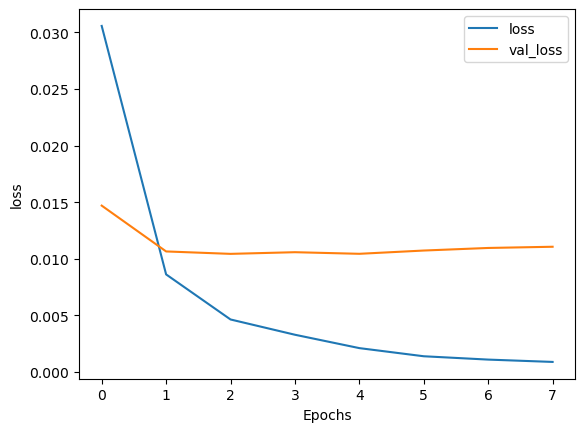

In [180]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plot_graphs(history, "loss")

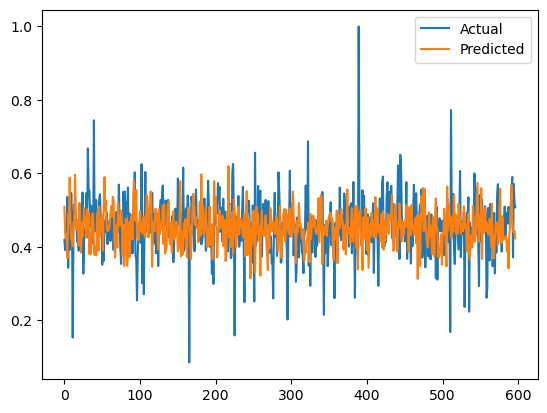

In [181]:
# plot the predicted prices against actual prices
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Predicted')
plt.legend()
plt.show()

### Model 3 - LSTM(128)->GRU(128)

In [183]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [184]:
#parameters for the below model
epochs = 50

#initializing the model
model = Sequential()
#Adding the embedding layer which will take in 32460 as input and provide a 300 dimensional output of those words which 
#will basically map information from higher dimension(word_embedding_matrix) with the dimension(32460,300) to a lower dimension allowing it to learn data more efficiently
#nb_words=32460 total words that we are gonna use after cleaning
#embedding_dim=300
#input_lenth=200 total length of our daily news
model.add(Embedding(nb_words,embedding_dim,weights=[word_embedding_matrix],input_length=200))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(GRU((128)))
model.add(Flatten())
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          9738000   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 256)         439296    
 l)                                                              
                                                                 
 gru (GRU)                   (None, 128)               148224    
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 10,325,649
Trainable params: 10,325,649
Non-trainable params: 0
____________________________________________

In [185]:
#compiling the model

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='adam')

In [191]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce
#Using ReduceLROnPlateau to monitor the learning rate
from tensorflow.keras.callbacks import ReduceLROnPlateau

#Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)

history = model.fit(train_X, train_y, batch_size=128,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop,reduce_lr])

Epoch 1/50
8/8 [==============================] - 44s 6s/step - loss: 0.0042 - val_loss: 0.0102 - lr: 1.0000e-04
Epoch 2/50
8/8 [==============================] - 46s 6s/step - loss: 0.0038 - val_loss: 0.0103 - lr: 1.0000e-04
Epoch 3/50
8/8 [==============================] - 46s 6s/step - loss: 0.0036 - val_loss: 0.0105 - lr: 1.0000e-04
Epoch 4/50
8/8 [==============================] - 44s 6s/step - loss: 0.0035 - val_loss: 0.0105 - lr: 1.0000e-04
Epoch 5/50
8/8 [==============================] - 45s 6s/step - loss: 0.0034 - val_loss: 0.0105 - lr: 1.0000e-04
Epoch 6/50
8/8 [==============================] - 46s 6s/step - loss: 0.0033 - val_loss: 0.0104 - lr: 1.0000e-04


In [192]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 9s 470ms/step


In [193]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))
print("MAPE :",mape(y_test,prediction))#anything below 5% is better


Mean Squared Error : 0.009983070515900963
Mean Absolute Error : 0.07501506069441599
MAPE : 0.18002784754158477


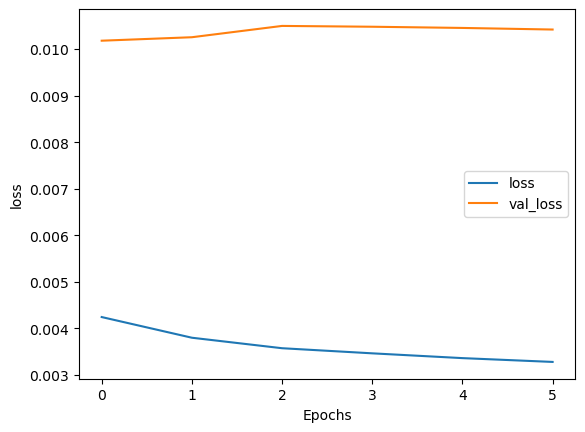

In [196]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plot_graphs(history, "loss")

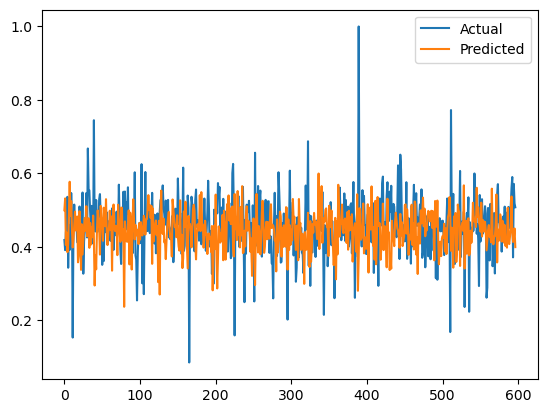

In [195]:
# plot the predicted prices against actual prices
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Predicted')
plt.legend()
plt.show()

### Model 4 - GRU(128)->LSTM(64)

In [201]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [202]:
#parameters for the below model
epochs = 50

#initializing the model
model = Sequential()
#Adding the embedding layer which will take in 32460 as input and provide a 300 dimensional output of those words which 
#will basically map information from higher dimension(word_embedding_matrix) with the dimension(32460,300) to a lower dimension allowing it to learn data more efficiently
#nb_words=32460 total words that we are gonna use after cleaning
#embedding_dim=300
#input_lenth=200 total length of our daily news
model.add(Embedding(nb_words,embedding_dim,weights=[word_embedding_matrix],input_length=200))
model.add(GRU(128,return_sequences=True))
model.add(Bidirectional(LSTM(64)))
model.add(Flatten())
#model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          9738000   
                                                                 
 gru (GRU)                   (None, 200, 128)          165120    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 10,002,065
Trainable params: 10,002,065
Non-trainable params: 0
____________________________________________

In [203]:
#compiling the model

#defining the loss function as mean_squared_error -> it is used for regression problems.
#optimizer=Adam, 
model.compile(loss='mean_squared_error', optimizer='adam')

In [204]:
#using EarlyStopping to stop the training of the model as validation accuracy starts to reduce
#Using ReduceLROnPlateau to monitor the learning rate
from tensorflow.keras.callbacks import ReduceLROnPlateau

#Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience=5, restore_best_weights=True)

history = model.fit(train_X, train_y, batch_size=64,epochs=epochs,verbose=1,validation_data=(val_X, val_y),callbacks = [early_stop,reduce_lr])

Epoch 1/50
16/16 [==============================] - 34s 2s/step - loss: 0.0604 - val_loss: 0.0229 - lr: 0.0010
Epoch 2/50
16/16 [==============================] - 26s 2s/step - loss: 0.0129 - val_loss: 0.0115 - lr: 0.0010
Epoch 3/50
16/16 [==============================] - 26s 2s/step - loss: 0.0062 - val_loss: 0.0113 - lr: 0.0010
Epoch 4/50
16/16 [==============================] - 26s 2s/step - loss: 0.0041 - val_loss: 0.0112 - lr: 0.0010
Epoch 5/50
16/16 [==============================] - 27s 2s/step - loss: 0.0030 - val_loss: 0.0108 - lr: 0.0010
Epoch 6/50
16/16 [==============================] - 25s 2s/step - loss: 0.0019 - val_loss: 0.0119 - lr: 0.0010
Epoch 7/50
16/16 [==============================] - 27s 2s/step - loss: 0.0013 - val_loss: 0.0117 - lr: 0.0010
Epoch 8/50
16/16 [==============================] - 26s 2s/step - loss: 0.0013 - val_loss: 0.0115 - lr: 0.0010
Epoch 9/50
16/16 [==============================] - 25s 2s/step - loss: 5.5649e-04 - val_loss: 0.0120 - lr: 0.00

In [205]:
#Prediction using the Model
prediction=model.predict([X_test],verbose=True)

19/19 [==============================] - 5s 216ms/step


In [206]:
#Compare test loss to training and validation loss
print("Mean Squared Error :",mse(y_test,prediction))
print("Mean Absolute Error :",mae(y_test,prediction))
print("MAPE :",mape(y_test,prediction))#anything below 5% is better


Mean Squared Error : 0.00940302905448916
Mean Absolute Error : 0.07202867303208024
MAPE : 0.17129417260178706


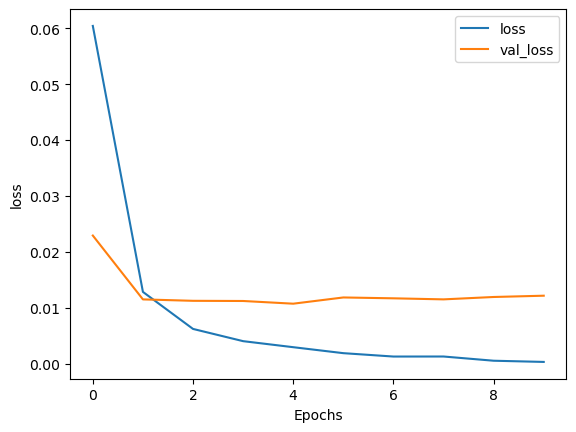

In [207]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plot_graphs(history, "loss")

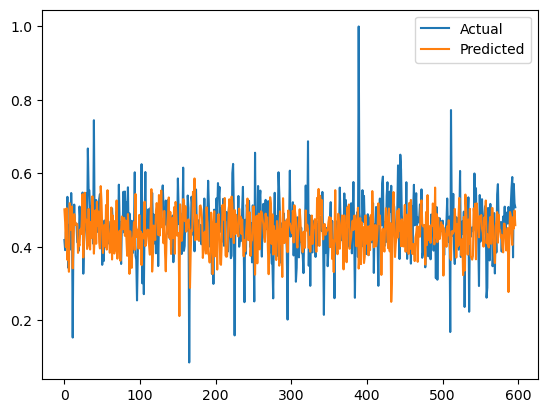

In [208]:
# plot the predicted prices against actual prices
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Predicted')
plt.legend()
plt.show()

## Doing Predictions using our own data

In [302]:
# Default news that you can use
create_news =  "Woman says note from Chinese 'prisoner' was hidden in new purse. \
               21,000 AT&T workers poised for Monday strike \
               housands march against Trump climate policies in D.C., across USA \
               Kentucky judge won't hear gay adoptions because it's not in the child's \"best interest\" \
               Multiple victims shot in UTC area apartment complex \
               Drones Lead Police to Illegal Dumping in Riverside County | NBC Southern California \
               An 86-year-old Californian woman has died trying to fight a man who was allegedly sexually assaulting her 61-year-old friend. \
               Fyre Festival Named in $5Million+ Lawsuit after Stranding Festival-Goers on Island with Little Food, No Security. \
               The \"Greatest Show on Earth\" folds its tent for good \
               U.S.-led fight on ISIS have killed 352 civilians: Pentagon \
               Woman offers undercover officer sex for $25 and some Chicken McNuggets \
               Ohio bridge refuses to fall down after three implosion attempts \
               Jersey Shore MIT grad dies in prank falling from library dome \
               New York graffiti artists claim McDonald's stole work for latest burger campaign \
               SpaceX to launch secretive satellite for U.S. intelligence agency \
               Severe Storms Leave a Trail of Death and Destruction Through the U.S. \
               Hamas thanks N. Korea for its support against ‘Israeli occupation’ \
               Baker Police officer arrested for allegedly covering up details in shots fired investigation \
               Miami doctor’s call to broker during baby’s delivery leads to $33.8 million judgment \
               Minnesota man gets 15 years for shooting 5 Black Lives Matter protesters \
               South Australian woman facing possible 25 years in Colombian prison for drug trafficking \
               The Latest: Deal reached on funding government through Sept. \
               Russia flaunts Arctic expansion with new military bases"



In [303]:
#removing contractions
import contractions

if True:
    text = create_news.split()
    new_text=[]
    for word in text:
    # using contractions.fix to expand the shortened words
        new_text.append(contractions.fix(word))  
    text= ' '.join(new_text)

In [304]:
#Cleaning text
if True:
    cleaned_text=text.split()
    temp=[]
    for word in cleaned_text:
      # using contractions.fix to expand the shortened words 
        temp.append(cleantext.clean(word,
        clean_all= True, # Execute all cleaning operations
        extra_spaces=True ,  # Remove extra white spaces 
        stemming=False , # Stem the words
        stopwords=True ,# Remove stop words
        lowercase=True ,# Convert to lowercase
        numbers=False ,# Remove all digits 
        punct=True ,# Remove all punctuations
        stp_lang='english'  # Language for stop words
        ))
    cleaned_text= ' '.join(temp)

In [305]:
cleaned_text

'woman says note  chinese prisoner  hidden  new purse 21000 att workers poised  monday strike housands march  trump climate policies  dc across usa kentucky judge   hear gay adoptions       childs best interest multiple victims shot  utc area apartment complex drones lead police  illegal dumping  riverside county  nbc southern california  86yearold californian woman  died trying  fight  man   allegedly sexually assaulting  61yearold friend fyre festival named  5million lawsuit  stranding festivalgoers  island  little food  security  greatest show  earth folds  tent  good yousled fight  isis  killed 352 civilians pentagon woman offers undercover officer sex  25   chicken mcnuggets ohio bridge refuses  fall   three implosion attempts jersey shore mit grad dies  prank falling  library dome new york graffiti artists claim mcdonalds stole work  latest burger campaign spacex  launch secretive satellite  yous intelligence agency severe storms leave  trail  death  destruction   yous hamas than

In [306]:
def news_to_int(news):
    '''Convert your created news into integers'''
    ints=[]
    for word in news.split():
        if word in vocab_to_int:
            ints.append(vocab_to_int[word])
        else:
            ints.append(vocab_to_int['<UNK>'])
    return ints

In [307]:
max_daily_length=200
def padding_news(news):
    '''Adjusts the length of your created news to fit the model's input values.'''
    padded_news= news
    if len(padded_news) < max_daily_length:
        for i in range(max_daily_length- len(padded_news)):
            padded_news.append(vocab_to_int["<PAD>"])
    elif len(padded_news) > max_daily_length:
        padded_news = padded_news[:max_daily_length]
    return padded_news

In [308]:
# revert predictions back to actual scale
def unnormalize(price):
    '''Revert values to their unnormalized amounts'''
    price= price * (max_value-min_value) + min_value
    return price

In [315]:
#clean_news= clean_text(create_news)
int_news = news_to_int(cleaned_text)
pad_news = padding_news(int_news)
pad_news = np.array(pad_news).reshape((1,-1))
pred = model.predict([pad_news])
price_change = unnormalize(pred)
print("The DJIA stock should open at : {} from the previous open.".format(np.round(price_change[0][0],2)))

1/1 [==============================] - 0s 54ms/step
The DJIA stock should open at : -27.889999389648438 from the previous open.
